# Project: Loan Eligibility Prediction

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix,classification_report
)

import warnings
warnings.filterwarnings("ignore")

# Data loading

In [2]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [5]:
train = train_data.copy()
test = test_data.copy()

# Data cleaning & EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
del train['Loan_ID']
del train['Loan_Status']
del test['Loan_ID']

In [9]:
# deal w/ missing value
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [10]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object'])

In [11]:
#fill missing categorical variables with the mode
for i in cat_cols:
    i_most = train[i].value_counts().index[0]
    train[i] = train[i].fillna(i_most)
    test[i] = test[i].fillna(i_most)
    

In [12]:
train['Loan_Status'] = train_data['Loan_Status']
cat_cols = train.select_dtypes(include=['object'])

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/2009043183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='Set2')
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/2009043183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='Set2')
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/2009043183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='Set2')
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipy

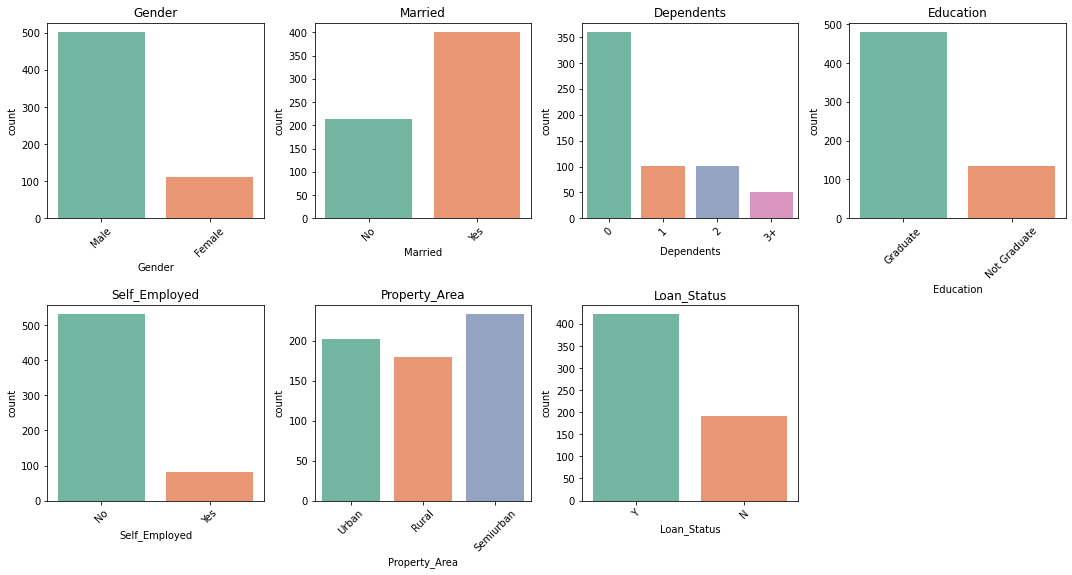

In [13]:
#hist for cat_cols
plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)  
    sns.countplot(x=col, data=train, palette='Set2')
    plt.title(f'{col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the chart, we can observe that:

- Out of approximately 600 applicants, around 500 are male (83.33%) and about 100 are female (16.67%).

- Around 400 applicants are married (66.67%).

- The majority have no dependents.

- Nearly 500 applicants are graduates.

- Most applicants are not self-employed, with fewer than 100 being self-employed (16.67%).

- In terms of property area, Semiurban has the highest number of applicants, followed by Urban, with Rural having the fewest.

- Regarding loan status, more than 400 applicants (~66.67%) were approved. It also showed dataset is unbalance.


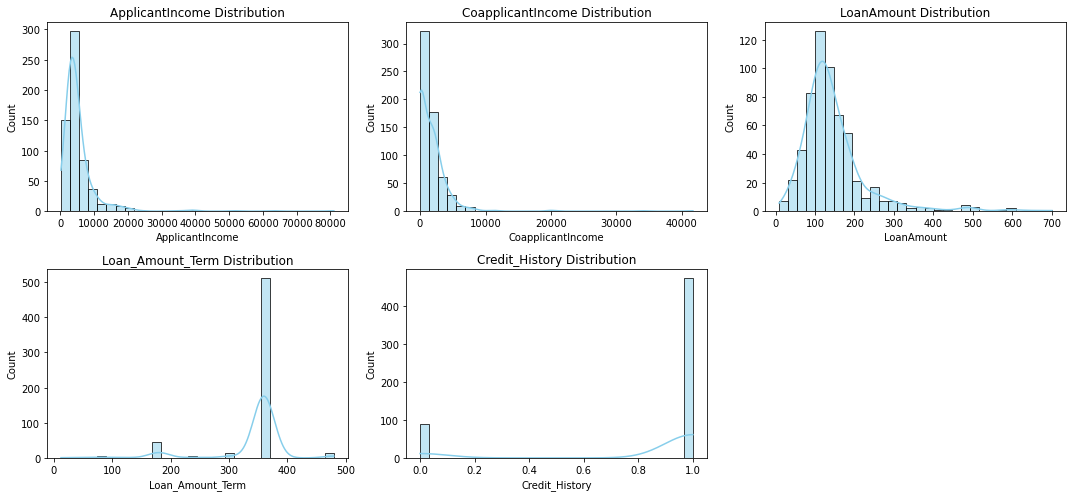

In [14]:
#hist for num_cols
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

From the chart, we can observe that:

- ApplicantIncome is mostly concentrated in the range of 0–10,000.

- CoapplicantIncome is primarily in the range of 0–5,000.

- LoanAmount is largely centered around 100.

- Loan_Amount_Term values are mainly around 360.

- Fewer than 100 applicants lack a credit history, with the majority having one.

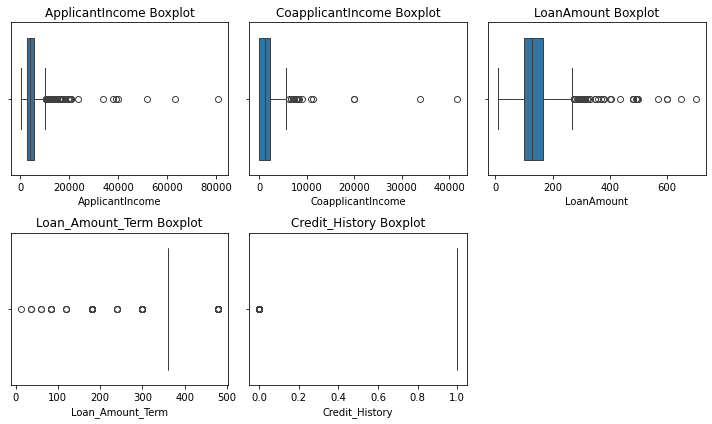

In [15]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

<AxesSubplot:>

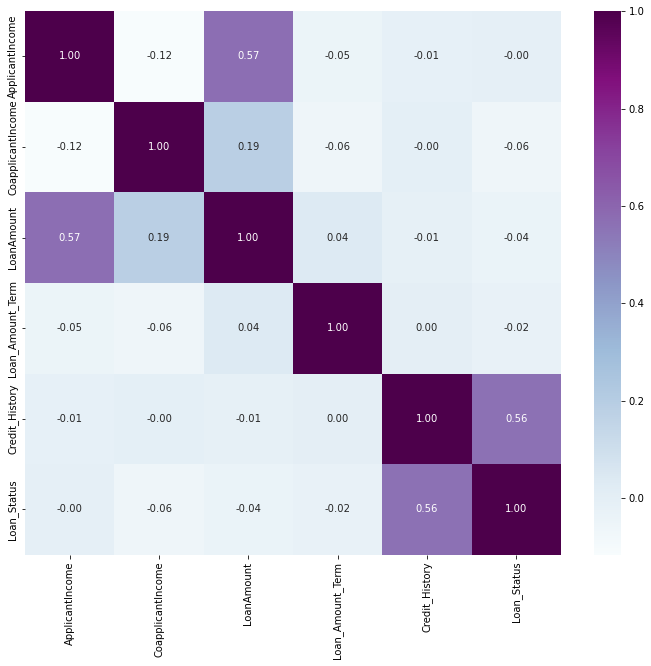

In [16]:
# map loan status
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
#corr among numerical features
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, cmap='BuPu', fmt=".2f")

After performing one-hot encoding and generating the correlation heatmap, I found that LoanAmount is positively correlated with ApplicantIncome, and Credit_History is strongly correlated with Loan_Status. 

- Therefore, missing values in ApplicantIncome can be imputed using predictive modeling. 

- In addition, missing values in Credit_History and Loan_Amount_Term can be filled with its mode.

- Since the test set does not contain the Loan_Status variable, predictive modeling cannot be applied to impute missing values in Credit_History

In [17]:
# fill na in Loan_Amount_Term & Credit_History
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

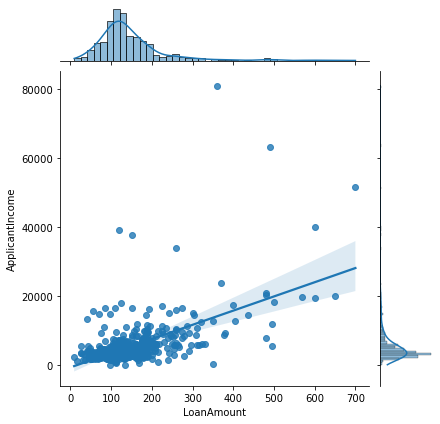

In [18]:
sns.jointplot(x='LoanAmount', y='ApplicantIncome',
                      data=train,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

In [19]:
# predict na in LoanAmount by using linear regression
#X,y train dataset
train_non_na = train.dropna(subset=['LoanAmount'])
X_train = train_non_na[['ApplicantIncome']].values
y_train = train_non_na['LoanAmount'].values

# predict dataset
predict_train = train['LoanAmount'].isna()
X_predict_train = train.loc[predict_train, ['ApplicantIncome']].values

predict_test = test['LoanAmount'].isna()
X_predict_test = test.loc[predict_test, ['ApplicantIncome']].values


#model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict
train.loc[predict_train, 'LoanAmount'] = lr.predict(X_predict_train)
test.loc[predict_test, 'LoanAmount'] = lr.predict(X_predict_test)

In [20]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# More EDA

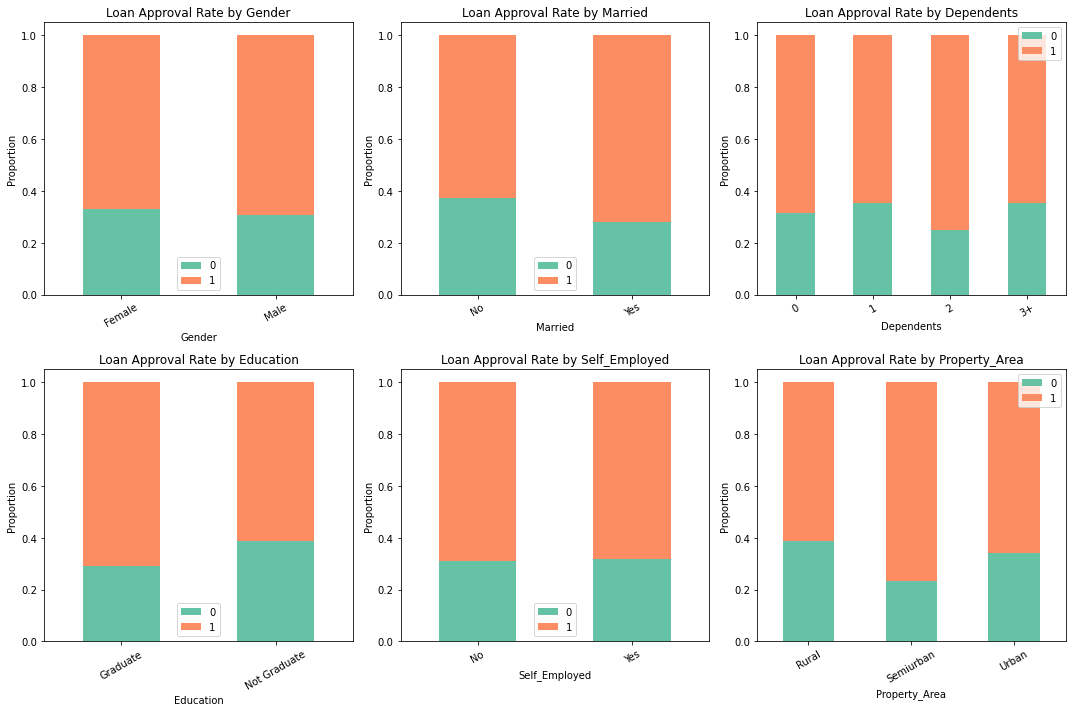

In [22]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    ct = pd.crosstab(train[col], train['Loan_Status'])
    ct_prop = ct.div(ct.sum(1).astype(float), axis=0)
    ct_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66c2a5', '#fc8d62'])
    
    plt.title(f'Loan Approval Rate by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=30)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

From the charts, we can observe the following trends:

- Gender: Male applicants have a slightly higher loan approval rate than females, but the difference is minimal, with both around 70%.

- Marital Status: Married applicants have a higher approval rate (around 70%) compared to unmarried applicants (around 60%).

- Dependents: Applicants with 2 dependents have the highest approval rate (around 80%), followed by those with 0 dependents (around 70%), while the rest are around 60%.

- Education: Graduates tend to have a higher approval rate (around 70%) compared to non-graduates (around 60%).

- Self-Employment: Being self-employed appears to have little to no significant impact on loan approval rates.

- Property Area: Applicants from semi-urban areas have the highest approval rate (around 80%), while those from rural areas have the lowest (around 60%).

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/3366529417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/3366529417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/3366529417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/3366529417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

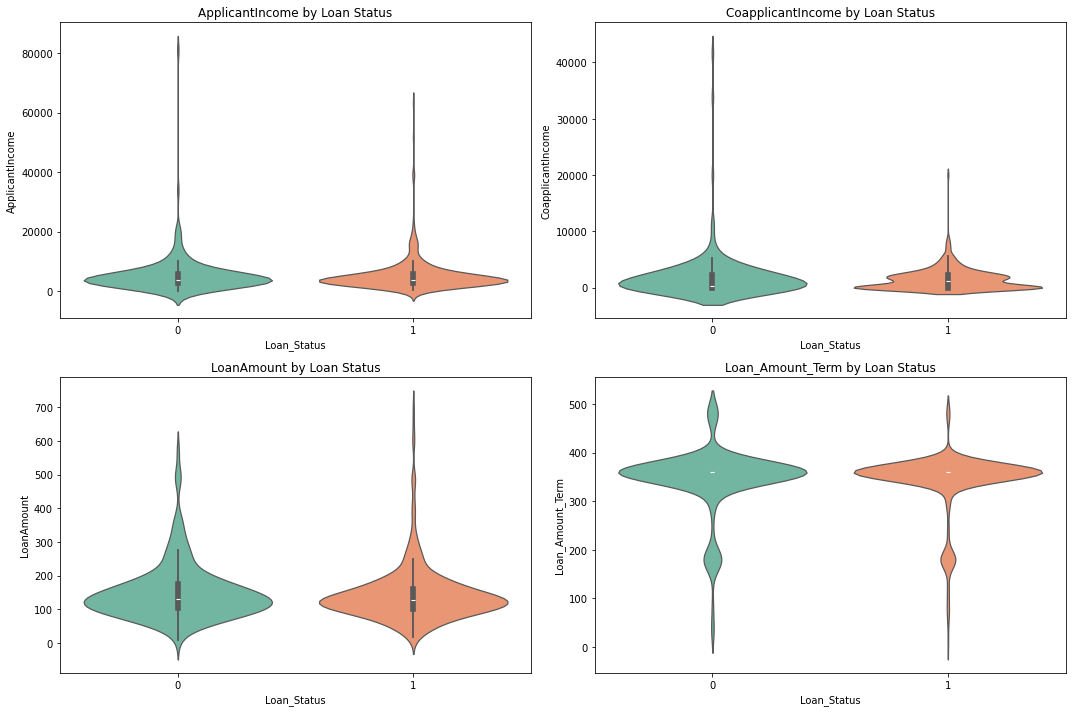

In [23]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(
        data=train,
        x='Loan_Status',
        y=col,
        palette='Set2'
    )
    plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()

In [24]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Loan_Income_Ratio'] = train['LoanAmount'] / train['TotalIncome']
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']


/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/339420813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='Loan_Status', y=col, palette='Set2', inner='quartile', cut=0)
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/339420813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='Loan_Status', y=col, palette='Set2', inner='quartile', cut=0)
/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/339420813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dat

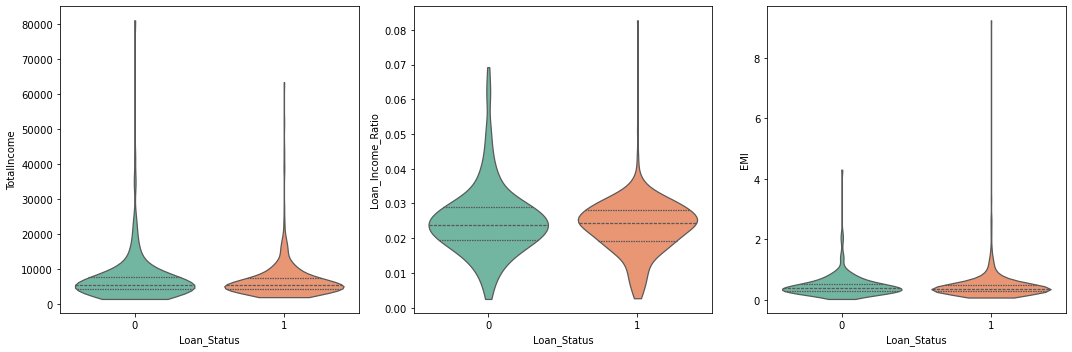

In [25]:
features = ['TotalIncome', 'Loan_Income_Ratio', 'EMI']

plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=train, x='Loan_Status', y=col, palette='Set2', inner='quartile', cut=0)
plt.tight_layout()
plt.show()

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/159587605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


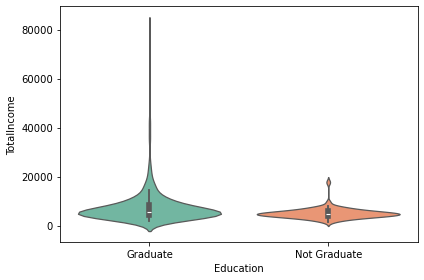

In [26]:
# plt.figure(figsize=(8, 6))
sns.violinplot(
    data=train,
    x='Education',
    y='TotalIncome',
    palette='Set2'
)
plt.tight_layout()
plt.show()

From the chart, it appears that some graduates have exceptionally high total incomes. This could be due to several reasons:
- Graduates are more likely to work in high-paying professions
- Outliers

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/383630377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


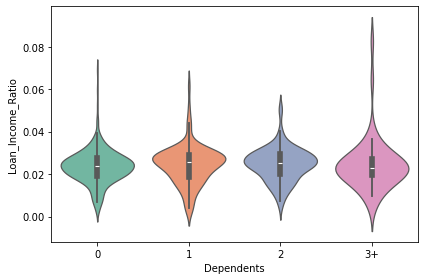

In [27]:
sns.violinplot(
    data=train,
    x='Dependents',
    y='Loan_Income_Ratio',
    palette='Set2'
)
plt.tight_layout()
plt.show()

From the plot, households with two dependents generally do not exhibit particularly high Loan-to-Income Ratios. However, in households with three or more dependents, some individuals have relatively high ratios. Additionally, certain single individuals with no dependents also show comparatively high Loan-to-Income Ratios.

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_21794/1171116079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='Dependents', y='EMI', palette='Set2')


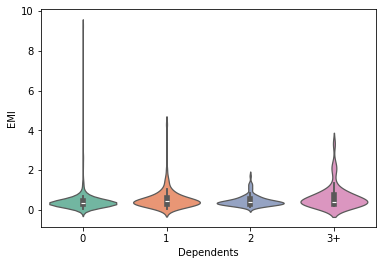

In [28]:
sns.violinplot(data=train, x='Dependents', y='EMI', palette='Set2')
plt.show()

From this chart, it is clear that some single individuals have very high monthly payments.

<Figure size 720x576 with 0 Axes>

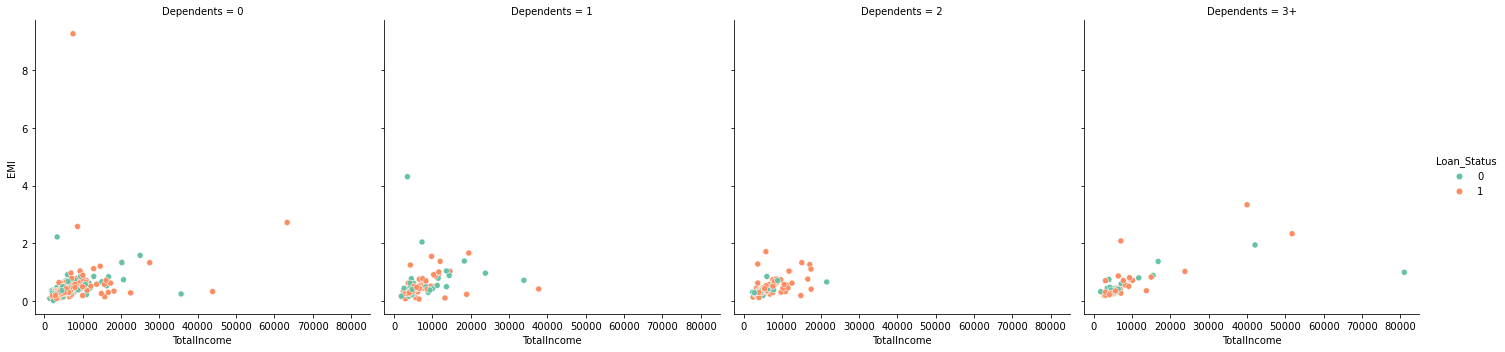

In [29]:
plt.figure(figsize=(10,8))
sns.relplot(
    data=train,
    x='TotalIncome',
    y='EMI',
    hue='Loan_Status',
    col='Dependents',
    kind='scatter',
    palette='Set2',
    height=5,
    aspect=1
)
plt.show()

<Figure size 720x576 with 0 Axes>

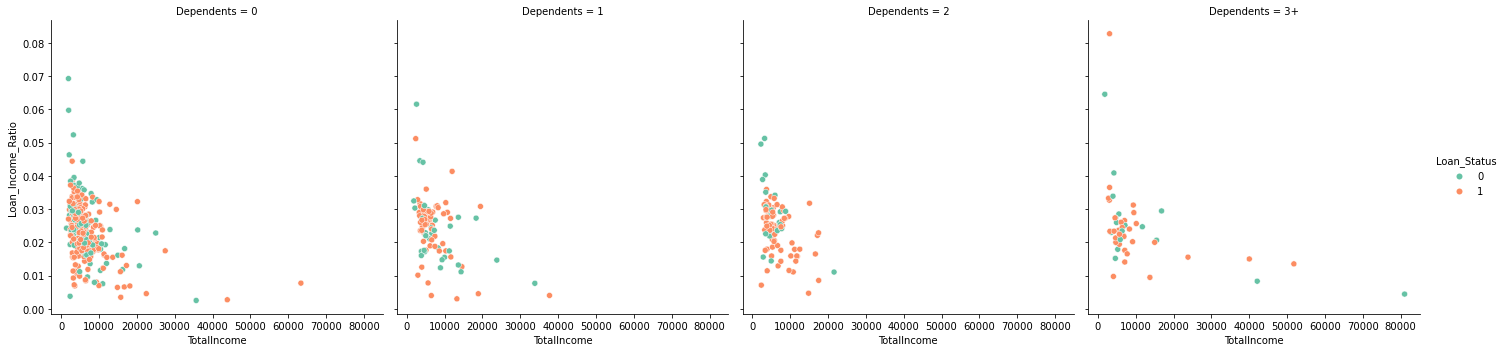

In [30]:
plt.figure(figsize=(10,8))
sns.relplot(
    data=train,
    x='TotalIncome',
    y='Loan_Income_Ratio',
    hue='Loan_Status',
    col='Dependents',
    kind='scatter',
    palette='Set2',
    height=5,
    aspect=1
)
plt.show()

Upon closer examination, there are noticeable outliers. 

- For applicants with 0 dependents, some have relatively low total income but extremely high EMI — and still obtained the loan. 
- In the 3+ dependents group, there are cases where total income is very low but the loan-to-income ratio is very high, and yet the loan was approved. Conversely, there is also a case of a 3+ dependents household with a very high total income and a low loan-to-income ratio that did not receive loan approval.

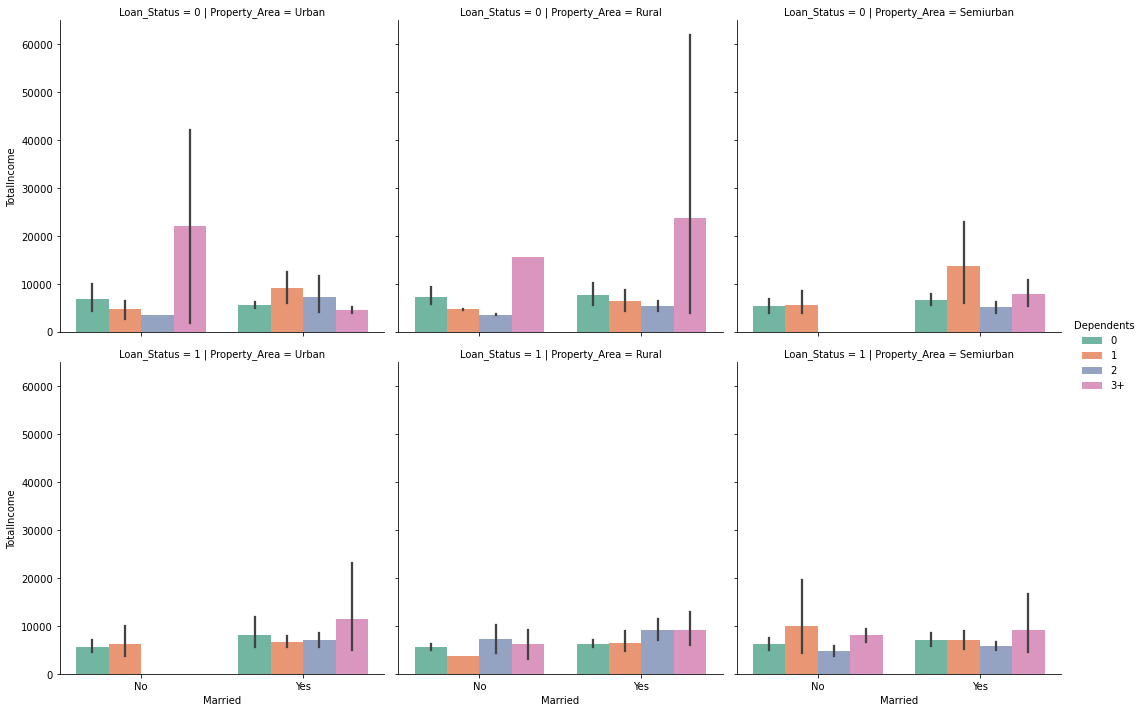

In [31]:
sns.catplot(
    data=train,
    x='Married',
    y= 'TotalIncome',
    hue='Dependents',
    row='Loan_Status',
    col='Property_Area',
    kind='bar',
    height=5,
    aspect=1,
    palette='Set2'
)
plt.show()

- From the chart, it is evident that among the applicants whose loans were not approved, a significant portion comes from unmarried households with 3+ dependents living in urban areas, as well as married households with 3+ dependents in rural areas. These characteristics are quite suspicious and may warrant further investigation. 
- On the other hand, semi-urban areas show the highest loan approval rates, with most households having only one dependent, indicating a relatively lighter financial burden.


In [32]:
# train['TotalIncome_bin']       = pd.qcut(train['TotalIncome'],        q=5, duplicates='drop')
# train['Loan_Income_Ratio_bin'] = pd.qcut(train['Loan_Income_Ratio'], q=5, duplicates='drop')
# train['EMI_bin']               = pd.qcut(train['EMI'],               q=5, duplicates='drop')

# Feature Engineering & Modelling 

In [33]:
drop = ['Loan_Status', 'TotalIncome', 'Loan_Income_Ratio', 'EMI']
X_train = train.drop(columns=drop)
y_train = train['Loan_Status']

predict = test

In [34]:
y_train.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Train dataset is imbalance, therefore I choose random oversampling

In [35]:
#ramdom oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
y_res.value_counts()

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


1    422
0    422
Name: Loan_Status, dtype: int64

In [36]:
# standardize data
scaler = StandardScaler()
X_res.loc[:, num_cols] = scaler.fit_transform(X_res[num_cols])
predict.loc[:, num_cols]   = scaler.transform(predict[num_cols])

# one-hot encoding
X_res = pd.get_dummies(X_res, columns=cat_cols, drop_first=False)
predict  = pd.get_dummies(predict,  columns=cat_cols, drop_first=False)


In [42]:
#split train&test set
X_tr, X_te, y_tr, y_te = train_test_split(
    X_res, y_res, test_size=0.2, random_state=50, stratify=y_res)

In [93]:
#logistic regression
log = LogisticRegression(max_iter=2000, solver="lbfgs")

# hyparameter
log_grid = {
    "C": [0.1, 1, 10],
    "class_weight": [None, "balanced"],
    "multi_class": ["auto"]
}

# tuning
grid_log = GridSearchCV(
    estimator=log,
    param_grid=log_grid,
    cv=5,                     
    scoring='accuracy',     
    n_jobs=-1  
)

grid_log.fit(X_tr, y_tr)


print("Best Parameters:", grid_log.best_params_)
print("Best Cross-Validation Score (Accuracy):", grid_log.best_score_)

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

Best Parameters: {'C': 0.1, 'class_weight': None, 'multi_class': 'auto'}
Best Cross-Validation Score (Accuracy): 0.7274074074074074


In [59]:
#knn
knn = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(knn, knn_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_tr, y_tr)

print("KNN Best Params:", grid_knn.best_params_)
print("KNN Best Score:", grid_knn.best_score_)

KNN Best Params: {'n_neighbors': 7, 'weights': 'distance'}
KNN Best Score: 0.7911111111111111


In [60]:
# radom forest
rf = RandomForestClassifier(random_state=50)
rf_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "class_weight": [None, "balanced"]
}

grid_rf = GridSearchCV(rf, rf_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_tr, y_tr)

print("RF Best Params:", grid_rf.best_params_)
print("RF Best Score:", grid_rf.best_score_)

RF Best Params: {'class_weight': None, 'max_depth': None, 'n_estimators': 100}
RF Best Score: 0.8548148148148147


In [61]:
# decision tree
dt = DecisionTreeClassifier(random_state=50)
dt_grid = {
    "max_depth": [None, 10, 20],
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"]
}

grid_dt = GridSearchCV(dt, dt_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_tr, y_tr)

print("DT Best Params:", grid_dt.best_params_)
print("DT Best Score:", grid_dt.best_score_)

DT Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None}
DT Best Score: 0.8325925925925926


In [62]:
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=50)
xgb_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(xgb, xgb_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_tr, y_tr)

print("XGB Best Params:", grid_xgb.best_params_)
print("XGB Best Score:", grid_xgb.best_score_)

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:00:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

XGB Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
XGB Best Score: 0.8548148148148147


In [63]:
#nn
nn = MLPClassifier(max_iter=1000, random_state=50)
nn_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001]
}

grid_nn = GridSearchCV(nn, nn_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_nn.fit(X_tr, y_tr)

print("NN Best Params:", grid_nn.best_params_)
print("NN Best Score:", grid_nn.best_score_)

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shuangshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

NN Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
NN Best Score: 0.8059259259259258


In [64]:
#gbm
gbm = GradientBoostingClassifier(random_state=50)
gbm_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

grid_gbm = GridSearchCV(gbm, gbm_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_gbm.fit(X_tr, y_tr)

print("GBM Best Params:", grid_gbm.best_params_)
print("GBM Best Score:", grid_gbm.best_score_)

GBM Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GBM Best Score: 0.8548148148148147


In [65]:
#svm
svm = SVC()
svm_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "class_weight": [None, "balanced"]
}

grid_svm = GridSearchCV(svm, svm_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_tr, y_tr)

print("SVM Best Params:", grid_svm.best_params_)
print("SVM Best Score:", grid_svm.best_score_)

SVM Best Params: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}
SVM Best Score: 0.7792592592592593


Best-performing models are XGBoost, Gradient Boosting, and Random Forest, each achieving an accuracy of 85%.

In [98]:
#evaluate model

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print(f"{name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred)) 
    print("-------------")

xgb_best = grid_xgb.best_estimator_
gbm_best = grid_gbm.best_estimator_
rf_best  = grid_rf.best_estimator_


evaluate_model("XGBoost", xgb_best, X_te, y_te)
evaluate_model("Gradient Boosting", gbm_best, X_te, y_te)
evaluate_model("Random Forest", rf_best, X_te, y_te)


XGBoost
Accuracy : 0.9053
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        85
           1       0.91      0.89      0.90        84

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169

-------------
Gradient Boosting
Accuracy : 0.8876
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        85
           1       0.89      0.88      0.89        84

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169

-------------
Random Forest
Accuracy : 0.9053
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        85
           1       0.91      0.89      0.90   

The evaluation on the test dataset indicates that XGBoost and Random Forest achieved the best overall performance among the tested models.

In [84]:
# importance of features and sort
importance = rf_best.feature_importances_
feature = X_tr.columns

imp_df = pd.DataFrame({
    "Feature": feature,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

imp_df.head(5)

Feature  Importance
4     Credit_History    0.228963
2         LoanAmount    0.183022
0    ApplicantIncome    0.180266
1  CoapplicantIncome    0.122018
3   Loan_Amount_Term    0.033135

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

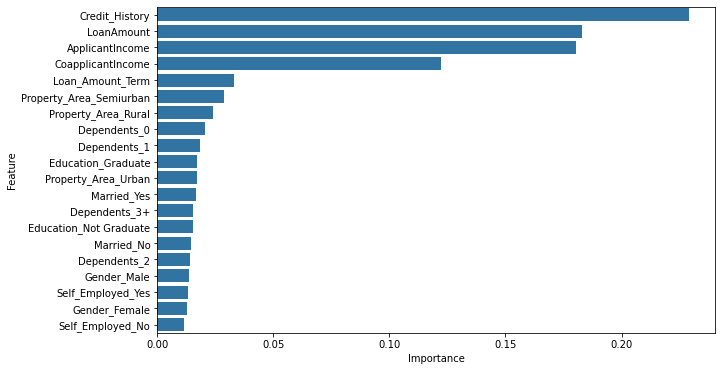

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = imp_df)

- Based on the feature importance chart, Credit History emerges as the most influential predictor, with Loan Amount, Applicant Income, and Coapplicant Income also contributing significantly. 
- In contrast, features like Self Employed, and especially Gender show relatively low importance.